# MNIST手写数字识别问题的单神经元模型实践

按课程案例，动手完成编码实践。

在不改变模型的结构基础上，尝试采用不同的学习率、单批次样本数、训练轮数等超参数，让模型的准确率达到90%。



提交要求：

1. 你认为最优的一次带运行结果的源代码文件（.ipynb 格式）
2. 作为附件上传



评分标准：
1. 完成案例中的代码，有完整的代码，模型能运行，准确率达87%以上；得6分；
2. 准确率达89%以上；再得2分，否则得0分；
3. 准确率达90%以上；再得2分，否则得0分；

# tensorflow2.0实现

In [1]:
from os.path import join, abspath, dirname

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(f'tensorflow 的版本为 {tf.__version__}')

tensorflow 的版本为 2.0.0


In [2]:
# 下载、导入数据集
data_path = join(abspath(dirname('.')), 'mnist.npz')
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(data_path)
# 数据标准化
train_images = train_images / 255.0
test_images = test_images / 255.0
# 标签值 One-Hot 编码
train_labels_ohe = tf.one_hot(train_labels, depth=10).numpy()
test_labels_ohe = tf.one_hot(test_labels, depth=10).numpy()

In [3]:
# 设置训练参数
train_epochs = 10  # 训练轮数
batch_size = 50  # 单次训练样本数（批次大小）
learning_rate = 0.001

In [4]:
# 建立模型
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')       
        ])
# 优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# 定义训练模式
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 训练模型
train_history = model.fit(train_images, train_labels_ohe,
                          batch_size=batch_size,
                          epochs=train_epochs,
                          verbose=2,  # 每epoch一行反馈。默认为1进度条
                          validation_split=0.2)  # 每epoch用作计算loss和metrics的比例

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 6s - loss: 0.2670 - accuracy: 0.9246 - val_loss: 0.1432 - val_accuracy: 0.9583
Epoch 2/10
48000/48000 - 4s - loss: 0.1133 - accuracy: 0.9663 - val_loss: 0.1060 - val_accuracy: 0.9690
Epoch 3/10
48000/48000 - 4s - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0942 - val_accuracy: 0.9709
Epoch 4/10
48000/48000 - 4s - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 5/10
48000/48000 - 4s - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0827 - val_accuracy: 0.9762
Epoch 6/10
48000/48000 - 4s - loss: 0.0302 - accuracy: 0.9914 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 7/10
48000/48000 - 4s - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 8/10
48000/48000 - 4s - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0953 - val_accuracy: 0.9749
Epoch 9/10
48000/48000 - 4s - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0916 - val_accuracy: 0.9748
Epoch 10/10
48

In [6]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels_ohe,
                                     verbose=0)  # 无反馈
print('Test accuracy:', test_acc)

Test accuracy: 0.9803


In [7]:
# 预测
predictions = model.predict(test_images)

In [8]:
# 定义可视化函数
def plot_images_labels_prediction(images,      # 图像列表
                                  labels,      # 标签列表
                                  prediction,  # 预测值列表
                                  index,       # 从第index个开始显示
                                  num=5):      # 缺省一次显示5幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 10: 
        num = 10            # 最多显示10个子图
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)  # 获取当前要处理的子图
        ax.imshow(images[index],  # 显示第index个图像
                  cmap='binary')
        title = f'label={labels[index]}'  # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title = f'{title},predict={np.argmax(predictions[index])}'
        ax.set_title(title, fontsize=10)   # 显示图上的title信息
        ax.set_xticks([])  # 不显示坐标轴
        ax.set_yticks([])        
        index += 1 
    plt.show()

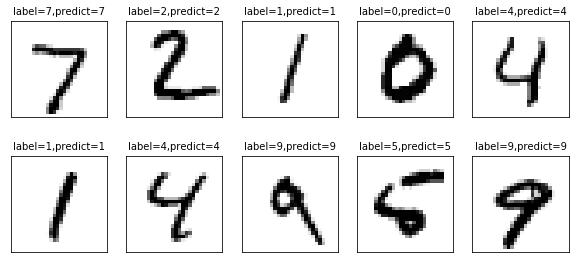

In [9]:
# 可视化预测结果
plot_images_labels_prediction(test_images,
                              test_labels,
                              predictions, 0, 10)

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)